In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_rows = 10

In [2]:
crimes_df = pd.read_csv('crime_data_edited.csv')

crimes_df

,Time Occurred,Crime Code,Victim Age,Day Occurred,Days To Report,Day of Year,Time of Day,Location Lat,Location Lng
0,230,626.0,25.0,Monday,0,150,NIGHT,34.0426,-118.2814
1,1845,626.0,41.0,Sunday,1,149,DAY,34.0698,-118.2528
2,1700,900.0,24.0,Sunday,1,149,DAY,34.0586,-118.2691
3,130,626.0,36.0,Monday,0,150,NIGHT,34.0444,-118.2809
4,325,210.0,21.0,Monday,0,150,NIGHT,34.0776,-118.2616
...,...,...,...,...,...,...,...,...,...
217026,1200,354.0,30.0,Thursday,762,335,DAY,34.1720,-118.6084
217027,1,627.0,4.0,Friday,1117,0,NIGHT,34.2172,-118.5667
217028,1000,815.0,42.0,Tuesday,793,333,DAY,34.2023,-118.6322
217029,1,354.0,26.0,Monday,929,213,NIGHT,34.2083,-118.6125


**Look at distribution of crime codes (lower crime code is more severe)**

There are a large amount of crimes reported that fall between 300 and 400 on the crime code scale, which is relatively low and therefore relatively severe. There are also a lot of crimes reported that fall between 600 and 700, which is a pretty unsevere crime code range.

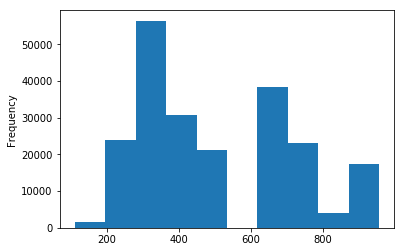

In [3]:
crimes_df['Crime Code'].plot.hist();

**Compare crime code (crime severity) with time of day (night or day and actual time on a 0-2359 scale)**

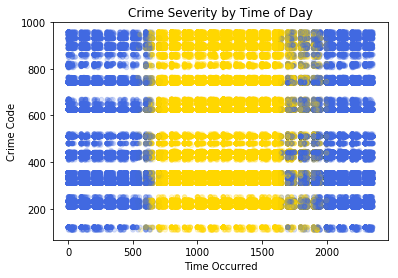

In [4]:
times = crimes_df['Time of Day'].map({
    'DAY': 'gold',
    'NIGHT': 'royalblue'
})
ax = crimes_df.plot.scatter(
    x='Time Occurred', y='Crime Code', 
    c=times, alpha=0.2,
    title="Crime Severity by Time of Day"
)

ax.get_figure().savefig("severity_time.jpeg")

We can see that time of day does not have an effect on the severity of crimes committed. There is no evidence from these visualizations that more severe crimes occur at night or vice versa. We can see however that the mean time occurred varies a lot for less severe crimes.

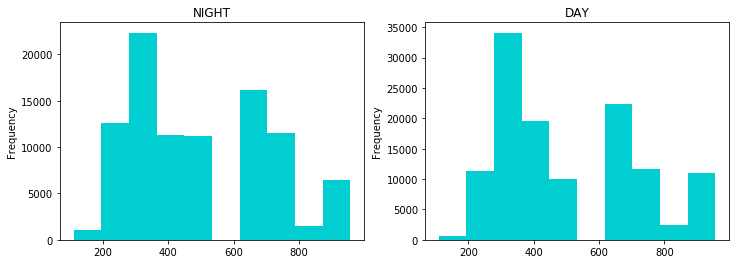

In [5]:
# Specifies a 1 x 2 grid of plots, figsize in inches
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

crimes_day = crimes_df["Time of Day"].unique()
for ax, cri_day in zip(axes, crimes_day):
    crime_type = crimes_df[crimes_df["Time of Day"] == cri_day]
    crime_type['Crime Code'].plot.hist(color='darkturquoise', ax=ax)
    ax.set_title(cri_day)
    
ax.get_figure().savefig("day_night_dist.jpeg")

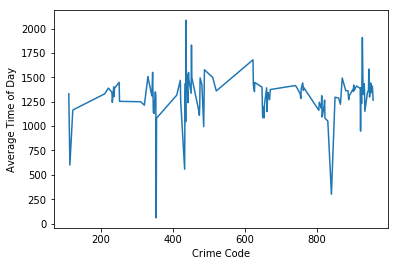

In [6]:
crimes_df.groupby('Crime Code')['Time Occurred'].mean().plot.line().set_ylabel('Average Time of Day');

**Crime code (crime severity) compared with victim age**

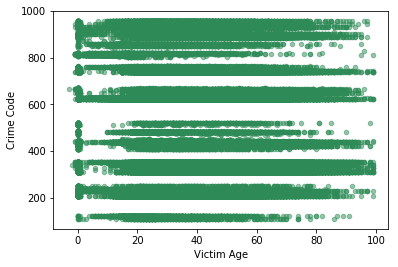

In [7]:
crimes_df.plot.scatter(x='Victim Age', y='Crime Code', c='seagreen', alpha=0.5);

There doesn't seem to be a relationship with severity of crime and the victim's age. There are in general more crimes reported for victims aged 0-10 and 20-40 years old.

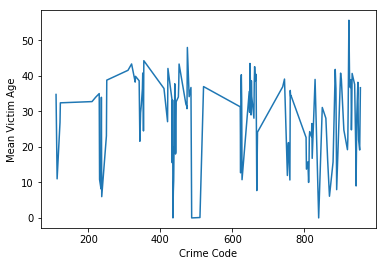

In [8]:
crimes_df.groupby('Crime Code')['Victim Age'].mean().plot.line().set_ylabel('Mean Victim Age');

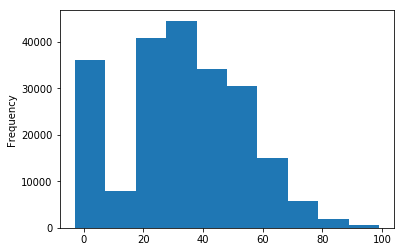

In [9]:
crimes_df['Victim Age'].plot.hist();

**Look at distribution of crime codes (lower crime code is more severe)**

There are a large amount of crimes reported that fall between 300 and 400 on the crime code scale, which is relatively low and therefore relatively severe. There are also a lot of crimes reported that fall between 600 and 700, which is a pretty unsevere crime code range.

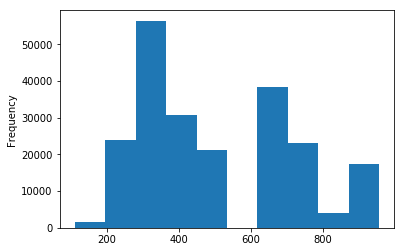

In [10]:
crimes_df['Crime Code'].plot.hist();

**Day of the week for crime code**

While there are most crimes occurring on Friday, and least on Saturday and Sunday, the amount of crimes each day doesn't differ greatly. The severity of crimes also does not change greatly day by day, with an average of about 500 consistently.

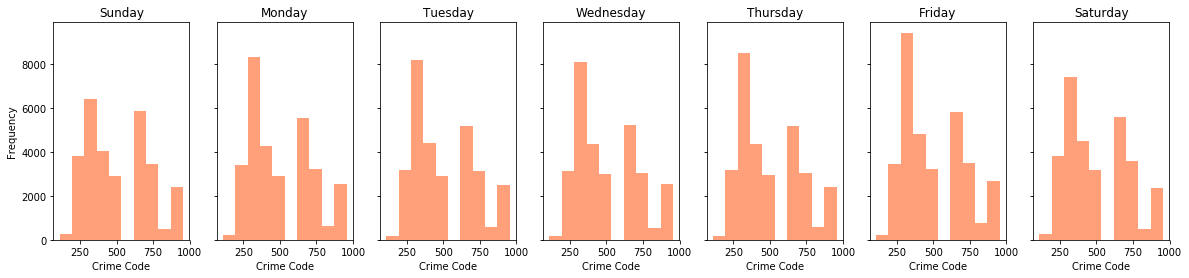

In [11]:
# Specifies a 1 x 7 grid of plots, figsize in inches
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 7, figsize=(20, 4), sharex=True, sharey=True)

thedays = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
for ax, cri_day in zip(axes, thedays):
    crime_type = crimes_df[crimes_df["Day Occurred"] == cri_day]
    crime_type['Crime Code'].plot.hist(color='lightsalmon', ax=ax)
    ax.set_title(cri_day)
    ax.set_xlabel('Crime Code')

ax.get_figure().savefig("severity_day_expand.jpeg")

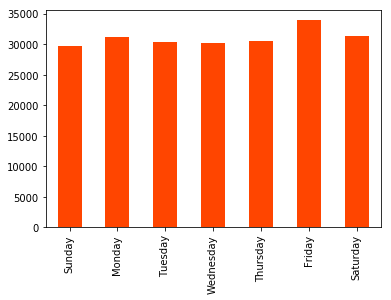

In [12]:
crimes_df['Day Occurred'].value_counts()[
    ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
].plot.bar(color='orangered');

ax.set_ylabel("Crime Severity")

ax.get_figure().savefig("severity_day.jpeg", bbox_inches="tight")

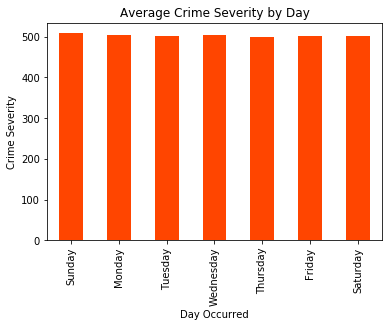

In [13]:
ax = crimes_df.groupby('Day Occurred')["Crime Code"].mean()[
    ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
].plot.bar(color='orangered', title="Average Crime Severity by Day");

ax.set_ylabel("Crime Severity")

ax.get_figure().savefig("severity_day.jpeg", bbox_inches="tight")

**Looking at Crime Severity, vicitm age, and days to report**

There's not a lot of correlation between days to report and crime severity. Almost all crimes are reported within the first 100 days, with most within the first 20 days. Victim age doesn't have a significant relationship with days to report

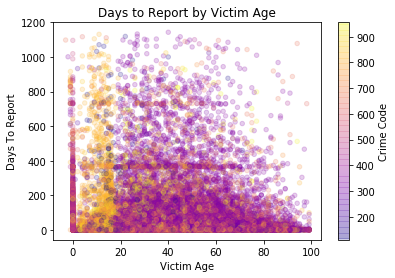

In [14]:
fig, ax = plt.subplots()
ax = crimes_df.plot.scatter(x='Victim Age', y='Days To Report', 
                            c='Crime Code', cmap="plasma", alpha=0.2, ax=ax,
                           title="Days to Report by Victim Age")
ax.get_figure().savefig("age_to_report.jpeg");

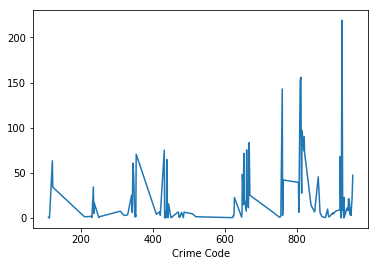

In [15]:
crimes_df.groupby('Crime Code')['Days To Report'].mean().plot.line();

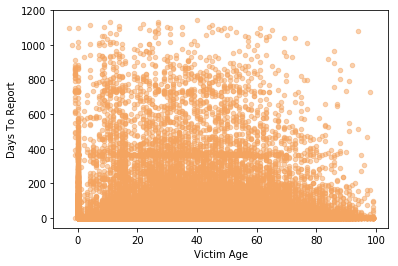

In [16]:
crimes_df.plot.scatter(x='Victim Age', y='Days To Report', alpha=0.5, c='sandybrown');